<a href="https://colab.research.google.com/github/bonima21/Insectoscope/blob/main/Insectoscope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

from __future__ import print_function, division

import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pickle
from PIL import Image
import datetime

plt.ion()   # interactive mode

In [65]:
from google.colab import files


# https://drive.google.com/file/d/1qKiyp4r8SqUtz2ZWk3E6oZhyhl6t8lyG/view?usp=sharing
!gdown --id 1qKiyp4r8SqUtz2ZWk3E6oZhyhl6t8lyG
path_class_names = "/content/class_names_restnet_leeds_butterfly.pkl"


# https://drive.google.com/file/d/1Ep2YWU4M-yVkF7AFP3aD1sVhuriIDzFe/view?usp=sharing
!gdown --id 1Ep2YWU4M-yVkF7AFP3aD1sVhuriIDzFe
path_model = "/content/model_state_restnet_leeds_butterfly.pth"


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qKiyp4r8SqUtz2ZWk3E6oZhyhl6t8lyG
To: /content/class_names_restnet_leeds_butterfly.pkl
100% 247/247 [00:00<00:00, 919kB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Ep2YWU4M-yVkF7AFP3aD1sVhuriIDzFe
From (redirected): https://drive.google.com/uc?id=1Ep2YWU4M-yVkF7AFP3aD1sVhuriIDzFe&confirm=t&uuid=9271e96b-9b0e-4398-a75a-90a9e736a06d
To: /content/model_state_restnet_leeds_butterfly.pth
100% 44.8M/44.8M [00:00<00:00, 166MB/s]


In [66]:
from google.colab import files

# Uncomment the code for uploading the input image
print("Please upload input image to predict:")
upload_input = files.upload()
path_input = "/content/{}".format(list(upload_input.keys())[0])

# Load the uploaded image
img = Image.open(path_input)
img_t = data_transforms_val(img)
batch_t = torch.unsqueeze(img_t, 0)
model_ft.eval()

# Perform inference as before...


Please upload input image to predict:


Saving ff.webp to ff (1).webp


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [71]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms_val = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [72]:
class_names = pickle.load(open(path_class_names, "rb"))
print(class_names)

['001_Danaus Plexippus', '002_Heliconius Charitonius', '003_Heliconius Erato', '004_Junonia Coenia', '005_Lycaena Phlaeas', '006_Nymphalis Antiopa', '007_Papilio Cresphontes', '008_Pieris Rapae', '009_Vanessa Atalanta', '010_Vanessa Cardui']


In [73]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [74]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [75]:
img = Image.open(path_input)
img_t = data_transforms_val(img)
batch_t = torch.unsqueeze(img_t, 0)
model_ft.eval()
# We don't need gradients for test, so wrap in
# no_grad to save memory
with torch.no_grad():
    batch_t = batch_t.to(device)
    # forward propagation
    output = model_ft( batch_t)
    # get prediction
    probs = torch.nn.functional.softmax(output, dim=1)
    conf, output = torch.max(probs, 1)
    # output = torch.argmax(output, 1)

2024-04-21 21:24:37.665879
Class: 006_Nymphalis Antiopa, confidence socre: 0.23


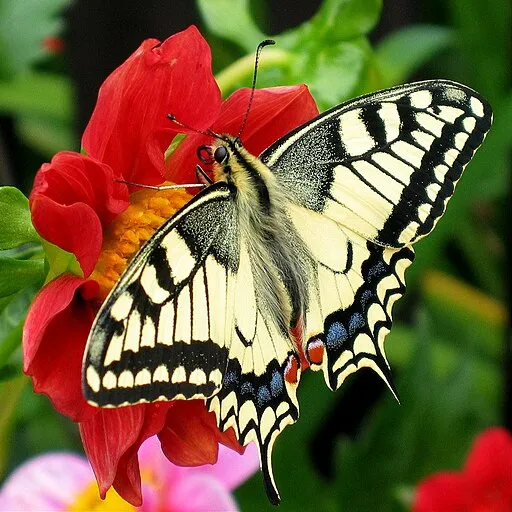

In [76]:
print(datetime.datetime.now())
print("Class: {}, confidence socre: {:.2f}".format(class_names[output.cpu()], conf[0]))
img

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

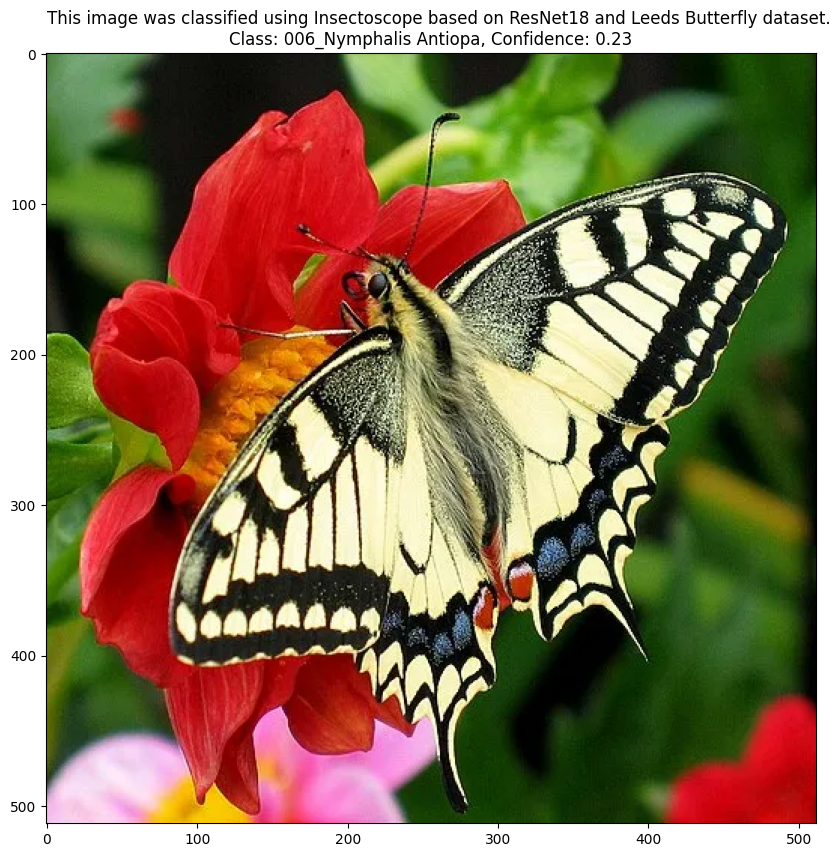

In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a new figure with a single subplot
fig = plt.figure(figsize=(10, 10))

# Load the image
img = mpimg.imread(path_input)

# Add the image to the subplot
plt.imshow(img)

# Add the class name and confidence rating as a title
plt.title(f"Class: {class_names[output.cpu()]}, Confidence: {conf[0]:.2f}")

# Add additional information as a caption
caption_text = "This image was classified using Insectoscope based on ResNet18 and Leeds Butterfly dataset."
plt.text(0, -20, caption_text, fontsize=12, ha='left')

# Save the figure as a PDF
plt.savefig("classification_result.pdf")

# Download the PDF
files.download("classification_result.pdf")
